In [ ]:
import os
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X = []
y = []
i = 0
for feature_file in os.listdir('./features'):
    feature = np.load(os.path.join('./features', feature_file))
    X.append(feature)
    # if len(feature) > 200:
    #     X.append(feature)
    #     y.append(np.ones(len(feature)) * i)
    #     i += 1

In [7]:
feature = np.concatenate(X, axis=0)
np.savetxt('features.tsv', feature, delimiter='\t', fmt='%.3f')

KeyboardInterrupt: 

In [24]:
centroids = [x.mean(axis=0) for x in X]
iter = 0
while True:
    print(iter)
    selected = []
    for i, x in enumerate(X):
        dis = 0
        for j, centroid in enumerate(centroids):
            if i != j:
                dis += np.sqrt(np.sum((x - centroid) ** 2, axis=1))
        selected.append(x[np.argsort(dis)[-50:]])
    centroids_ = [x.mean(axis=0) for x in selected]
    if np.allclose(np.stack(centroids), np.stack(centroids_)):
        break
    centroids = centroids_
    iter += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


2


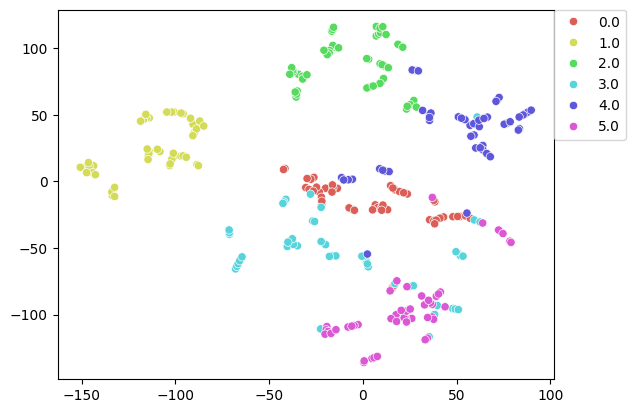

5


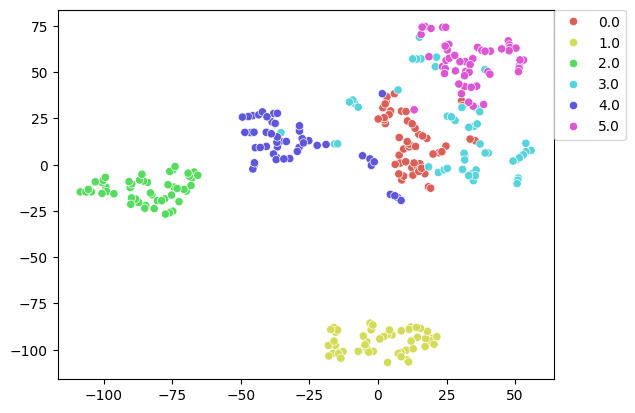

30


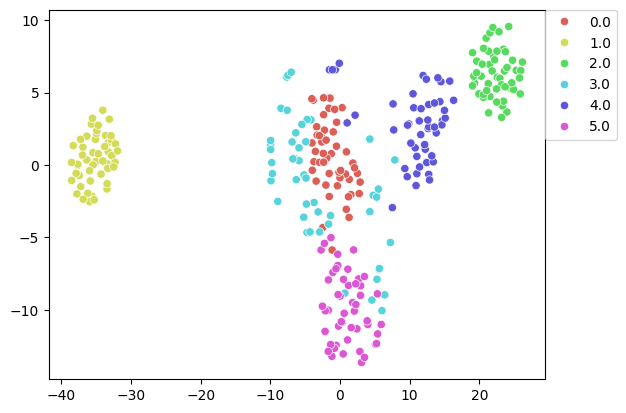

50


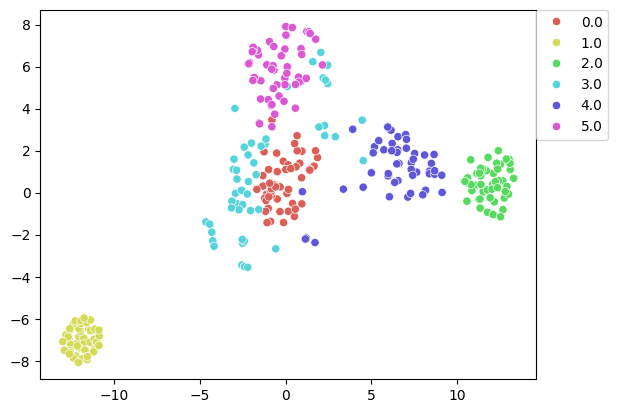

100


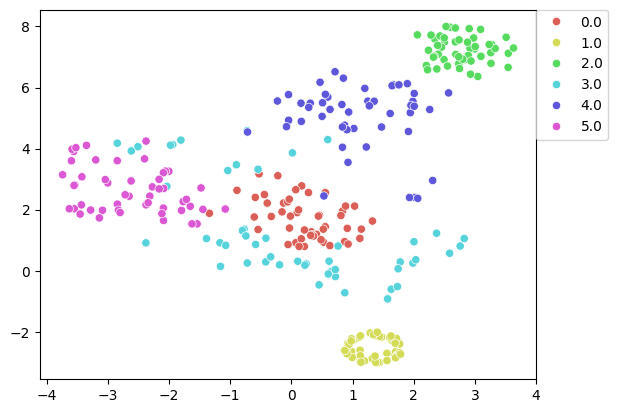

In [28]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

selected = []
for x, centroid in zip(X, centroids):
    selected.append(x[np.argsort(np.sqrt(np.sum((x - centroid) ** 2, axis=1)))[:50]])
x = np.concatenate(selected, axis=0)
x = PCA(n_components=50).fit_transform(x)
for perplexity in [2, 5, 30, 50, 100]:
    print(perplexity)
    tsne_x, tsne_y = TSNE(perplexity=perplexity, n_iter=5000).fit_transform(x).T
    plt.figure()
    sns.scatterplot(x=tsne_x, y=tsne_y, hue=np.concatenate([np.ones(len(j)) * i for i, j in enumerate(selected)]), palette=sns.palettes.hls_palette(6))
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    plt.show()

In [29]:
for i, x in enumerate(selected):
    np.save(f'{i}.npy', x)